In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The youngest person was 4.8 months old and the oldest person was 80 years old

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df['PassengerId'].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

342 people survived but 549 people didn't

In [9]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [10]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

There were 314 female and 577 male

In [12]:
df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [13]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

There are 3 values for Pclass, 216 people from class one, 184 people from class 2 and 491 people from class 3

Text(0.5, 1.0, 'Survived count')

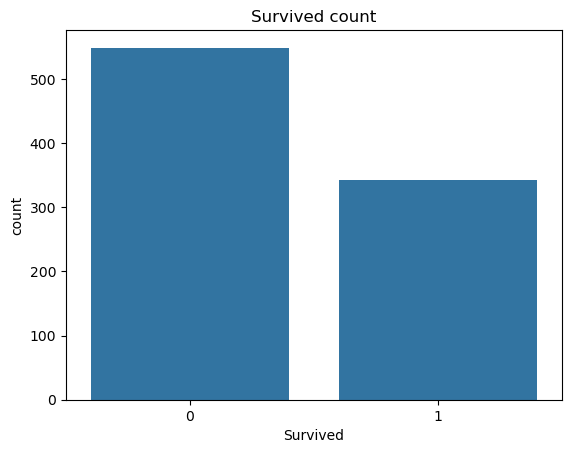

In [14]:
sns.countplot(x = "Survived", data = df)
plt.title("Survived count")

Text(0.5, 1.0, 'Survived by gender')

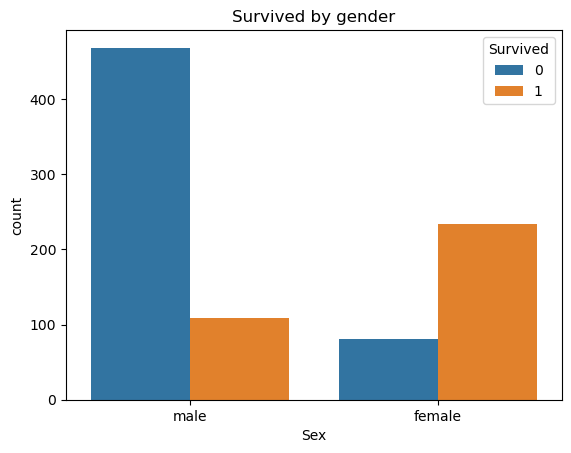

In [15]:
sns.countplot(x = "Sex", hue = "Survived", data = df)
plt.title("Survived by gender")

Female survivors are more than male survivor

Text(0.5, 1.0, 'Survived by age')

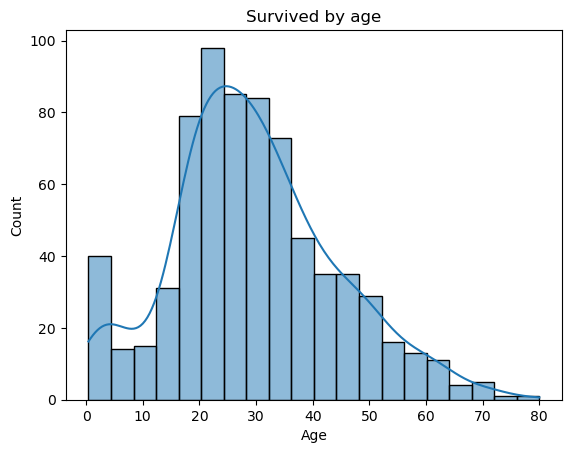

In [16]:
sns.histplot(x = "Age", data = df, kde = True)
plt.title("Survived by age")

There were mostly 20 to 40 years old

Text(0.5, 1.0, 'Survived by passenger seat class')

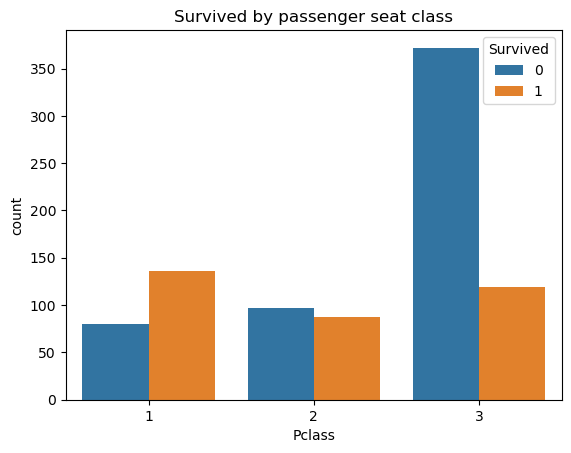

In [17]:
sns.countplot(x = 'Pclass', hue = "Survived", data = df)
plt.title("Survived by passenger seat class")

Most of survivers are from passenger class 1 and most of death is from passenger class 3

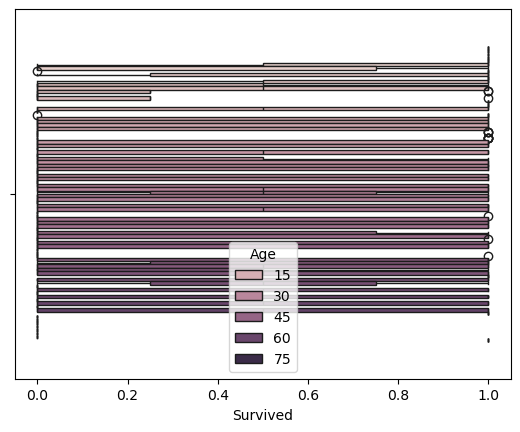

In [18]:
sns.boxplot(x = 'Survived', hue = 'Age', data = df)
plt.show()

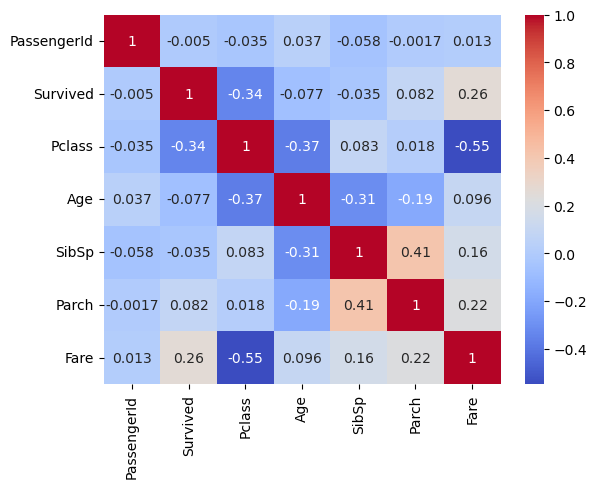

In [19]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot = True , cmap = 'coolwarm')
plt.show()

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df["Embarked"].fillna(df["Embarked"].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df.to_csv("titanic-cleaned.csv", index = False)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [26]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first= True)

In [27]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand = False)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True,Mr


In [29]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [30]:
df['Title'] = df['Title'].replace(['Miss', 'Mlle', 'Ms', 'Lady', 'Mme'], 'Mrs')
df['Title'] = df['Title'].replace(['Rev', 'Col', 'Countess', 'Capt', 'Sir', 'Don', 'Jonkheer' , 'Major', ], 'Rare')

In [31]:
df['Title'].value_counts()

Title
Mr        517
Mrs       312
Master     40
Rare       15
Dr          7
Name: count, dtype: int64

In [32]:
df['Age Band'] = pd.cut(df['Age'], 5, labels=[1, 2, 3, 4, 5])

In [33]:
df['Age Band'].value_counts()

Age Band
2    523
3    188
1    100
4     69
5     11
Name: count, dtype: int64

In [34]:
df['Fare'].isnull().sum()

0

In [35]:
df['Fare band'] = pd.qcut(df['Fare'], 5, labels=[1, 2, 3, 4, 5])

In [36]:
df['Fare band'].value_counts()

Fare band
2    184
4    180
1    179
5    176
3    172
Name: count, dtype: int64

In [37]:
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'].fillna('U')

0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: Cabin, Length: 891, dtype: object

In [38]:
df['Cabin'].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [39]:
df['Cabin'] = le.fit_transform(df['Cabin'])
df['Title'] = le.fit_transform(df['Title'])

In [40]:
df['Cabin'].value_counts()

Cabin
8    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
7      1
Name: count, dtype: int64

In [41]:
df = df.drop('Name', axis = 1)

In [42]:
df = df.drop('Ticket', axis = 1)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age' , 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [44]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_Rmodel = LogisticRegression(max_iter= 500, solver='liblinear')
log_Rmodel.fit(X_train, y_train)
y_log_prdct = log_Rmodel.predict(X_test)

log_Raccuracy =accuracy_score(y_test, y_log_prdct)
print(log_Raccuracy)

0.8100558659217877


In [47]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators= 100, random_state= 42)
RF_model.fit(X_train, y_train)
y_RF_prdct = RF_model.predict(X_test)

RF_accuracy = accuracy_score(y_test, y_RF_prdct)
print(RF_accuracy)

0.8379888268156425


In [48]:
from sklearn.model_selection import cross_val_score

logR_cv = cross_val_score(log_Rmodel, X, y, cv= 5).mean()
print(f'Logistic Regression Cross Validation Accuracy is:{logR_cv * 100:2f}')

RF_cv = cross_val_score(RF_model, X, y, cv= 5).mean()
print(f'Random Forest Cross Validation Accuracy is:{RF_cv * 100:2f}')

Logistic Regression Cross Validation Accuracy is:79.460800
Random Forest Cross Validation Accuracy is:80.367836


In [53]:
from sklearn.metrics import confusion_matrix

RF_CM = confusion_matrix(y_test, y_RF_prdct)
print(RF_CM)

[[93 12]
 [17 57]]


In [54]:
LR_CM = confusion_matrix(y_test, y_log_prdct)
print(LR_CM)

[[91 14]
 [20 54]]


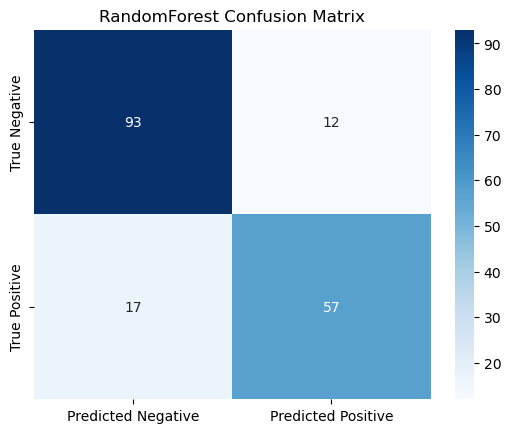

In [57]:
sns.heatmap(RF_CM, annot= True, cmap = 'Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.title('RandomForest Confusion Matrix')
plt.show()

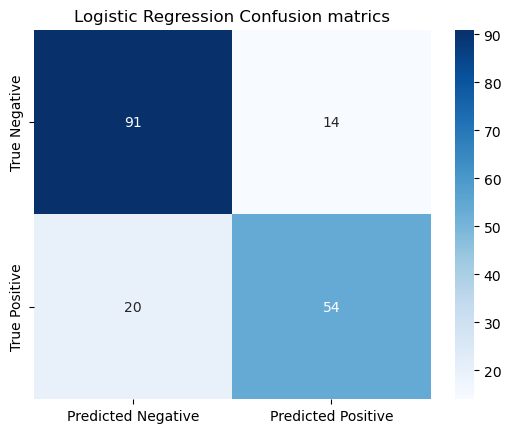

In [58]:
sns.heatmap(LR_CM, annot = True, cmap = 'Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.title('Logistic Regression Confusion matrics')
plt.show()

In [59]:
from sklearn.metrics import classification_report
CR_RF = classification_report(y_test, y_RF_prdct)
CR_LR = classification_report(y_test, y_log_prdct)
print(f'LogisticRegression report: {CR_LR}')
print(f'Random Forest report : {CR_RF}')

LogisticRegression report:               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest report :               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

